In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. The LASSO and Boosting for Regression
#### (a) Download the Communities and Crime data1 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [3]:
path = '../Data/communities.txt'
col_name = []
with open(path, 'r') as name_read:
    for row in name_read:
        spl = [att for att in row.split()]
        if not spl == []:
            if spl[0] == '@attribute':
                col_name.append(spl[1])

path1 = '../Data/communities.data'
df = pd.read_csv(path1, header=None, sep=',')            
df.columns = col_name
c_train = df.iloc[0:1495,:]
c_test = df.iloc[1495:,:]
c_train

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1490      6      ?         ?     Hillsboroughtown     8        0.00   
1491      6      ?         ?           Orangecity     8        0.16   
1492     13      ?         ?         Waycrosscity     8        0.01   
1493     39     85     49056           Mentorcity     8        0.06   
1494     34     17     79610      WestNewYorktown     8        0.05   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1490           0.59          0.01          0.69          1.00  ...      0.02   
1491           0.62          0.03          0.74          0.48  ...      0.07   
1492           0.36          0.95          0.24          0.03  ...      0.03   
1493           0.53          0.01          0.98          0.05  ...      0.08   
1494           0.43          0.08          0.65          0.12  ...      0.00   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1490     0.14            0.22          ?              ?                    ?   
1491     0.40            0.14       0.07           0.05                 0.85   
1492     0.12            0.01          ?              ?                    ?   
1493     0.15            0.02          ?              ?                    ?   
1494     1.00            1.00          0           0.01                 0.77   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1490                    ?                 0.00                ?   
1491                  0.5                 0.61             0.19   
1492                    ?                 0.00                ?   
1493                    ?                 0.00                ?   
1494                    0                 0.51             0.18   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1490                 0.03  
1491                 0.20  
1492                 0.30  
1493                 0.03  
1494                 0.23  

[1495 rows x 128 columns]

#### (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [4]:
c_train1 = c_train.iloc[:, 5:]
c_test1 = c_test.iloc[:, 5:]
c_train1.replace('?', np.nan, inplace=True)
c_test1.replace('?', np.nan, inplace=True)
c_test1

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1495        0.00           0.20          0.03          0.91          0.23   
1496        0.00           0.55          0.13          0.78          0.15   
1497        0.00           0.52          0.04          0.59          0.05   
1498        0.04           0.51          0.07          0.92          0.09   
1499        0.03           0.59          0.20          0.75          0.19   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
1495         0.05         0.15         0.19         0.09        0.42  ...   
1496         0.36         0.48         0.53         0.30        0.10  ...   
1497         0.62         0.84         0.78         0.75        0.43  ...   
1498         0.03         0.38         0.47         0.27        0.35  ...   
1499         0.10         0.38         0.62         0.35        0.11  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
1495      0.01     0.23            0.73        NaN            NaN   
1496      0.01     0.18            0.02        NaN            NaN   
1497      0.01     0.18            0.00        NaN            NaN   
1498      0.06     0.13            0.16        NaN            NaN   
1499      0.03     0.23            0.06        NaN            NaN   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05        NaN            NaN   
1990      0.02     0.37            0.20        NaN            NaN   
1991      0.08     0.32            0.18       0.08           0.06   
1992      0.03     0.38            0.33       0.02           0.02   
1993      0.11     0.30            0.05       0.08           0.04   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
1495                  NaN                  NaN                 0.00   
1496                  NaN                  NaN                 0.00   
1497                  NaN                  NaN                 0.00   
1498                  NaN                  NaN                 0.00   
1499                  NaN                  NaN                 0.00   
...                   ...                  ...                  ...   
1989                  NaN                  NaN                 0.00   
1990                  NaN                  NaN                 0.00   
1991                 0.78                    0                 0.91   
1992                 0.79                    0                 0.22   
1993                 0.73                  0.5                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
1495              NaN                 0.12  
1496              NaN                 0.11  
1497              NaN                 0.12  
1498              NaN                 0.06  
1499              NaN                 0.12  
...               ...                  ...  
1989              NaN                 0.09  
1990              NaN                 0.45  
1991             0.28                 0.23  
1992             0.18   

In [5]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(c_train1)
c_train2 = imp_mean.transform(c_train1)
c_test2 = imp_mean.transform(c_test1)
c_train2 = pd.DataFrame(c_train2)
c_test2 = pd.DataFrame(c_test2)
c_train2.columns = col_name[5:]
c_test2.columns = col_name[5:]
c_test2

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          0.00           0.20          0.03          0.91          0.23   
1          0.00           0.55          0.13          0.78          0.15   
2          0.00           0.52          0.04          0.59          0.05   
3          0.04           0.51          0.07          0.92          0.09   
4          0.03           0.59          0.20          0.75          0.19   
..          ...            ...           ...           ...           ...   
494        0.01           0.40          0.10          0.87          0.12   
495        0.05           0.96          0.46          0.28          0.83   
496        0.16           0.37          0.25          0.69          0.04   
497        0.08           0.51          0.06          0.87          0.22   
498        0.20           0.78          0.14          0.46          0.24   

     racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0           0.05         0.15         0.19         0.09        0.42  ...   
1           0.36         0.48         0.53         0.30        0.10  ...   
2           0.62         0.84         0.78         0.75        0.43  ...   
3           0.03         0.38         0.47         0.27        0.35  ...   
4           0.10         0.38         0.62         0.35        0.11  ...   
..           ...          ...          ...          ...         ...  ...   
494         0.16         0.43         0.51         0.35        0.30  ...   
495         0.32         0.69         0.86         0.73        0.14  ...   
496         0.25         0.35         0.50         0.31        0.54  ...   
497         0.10         0.58         0.74         0.63        0.41  ...   
498         0.77         0.50         0.62         0.40        0.17  ...   

     LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0        0.01     0.23            0.73   0.163975       0.080502   
1        0.01     0.18            0.02   0.163975       0.080502   
2        0.01     0.18            0.00   0.163975       0.080502   
3        0.06     0.13            0.16   0.163975       0.080502   
4        0.03     0.23            0.06   0.163975       0.080502   
..        ...      ...             ...        ...            ...   
494      0.01     0.28            0.05   0.163975       0.080502   
495      0.02     0.37            0.20   0.163975       0.080502   
496      0.08     0.32            0.18   0.080000       0.060000   
497      0.03     0.38            0.33   0.020000       0.020000   
498      0.11     0.30            0.05   0.080000       0.040000   

     LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0               0.713054             0.451883                 0.00   
1               0.713054             0.451883                 0.00   
2               0.713054             0.451883                 0.00   
3               0.713054             0.451883                 0.00   
4               0.713054             0.451883                 0.00   
..                   ...                  ...                  ...   
494             0.713054             0.451883                 0.00   
495             0.713054             0.451883                 0.00   
496             0.780000             0.000000                 0.91   
497             0.790000             0.000000                 0.22   
498             0.730000             0.500000                 1.00   

     PolicBudgPerPop  ViolentCrimesPerPop  
0           0.190753                 0.12  
1           0.190753                 0.11  
2           0.190753                 0.12  
3           0.190753                 0.06  
4           0.190753                 0.12  
..               ...                  ...  
494         0.190753                 0.09  
495         0.190753                 0.45  
496         0.280000                 0.23  
497         0.180000                 0.19  
498         0.130000                 

#### (c) Plot a correlation matrix for the features in the data set.

In [6]:
combine = c_train2.append(c_test2, ignore_index=True)
combine

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163975       0.080502   
2         0.01     0.21            0.02   0.163975       0.080502   
3         0.02     0.39            0.28   0.163975       0.080502   
4         0.04     0.09            0.02   0.163975       0.080502   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05   0.163975       0.080502   
1990      0.02     0.37            0.20   0.163975       0.080502   
1991      0.08     0.32            0.18   0.080000       0.060000   
1992      0.03     0.38            0.33   0.020000       0.020000   
1993      0.11     0.30            0.05   0.080000       0.040000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.713054             0.451883                 0.00   
2                0.713054             0.451883                 0.00   
3                0.713054             0.451883                 0.00   
4                0.713054             0.451883                 0.00   
...                   ...                  ...                  ...   
1989             0.713054             0.451883                 0.00   
1990             0.713054             0.451883                 0.00   
1991             0.780000             0.000000                 0.91   
1992             0.790000             0.000000                 0.22   
1993             0.730000             0.500000                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.190753                 0.67  
2            0.190753                 0.43  
3            0.190753                 0.12  
4            0.190753                 0.03  
...               ...                  ...  
1989         0.190753                 0.09  
1990         0.190753                 0.45  
1991         0.280000                 0.23  
1992         0.180000   

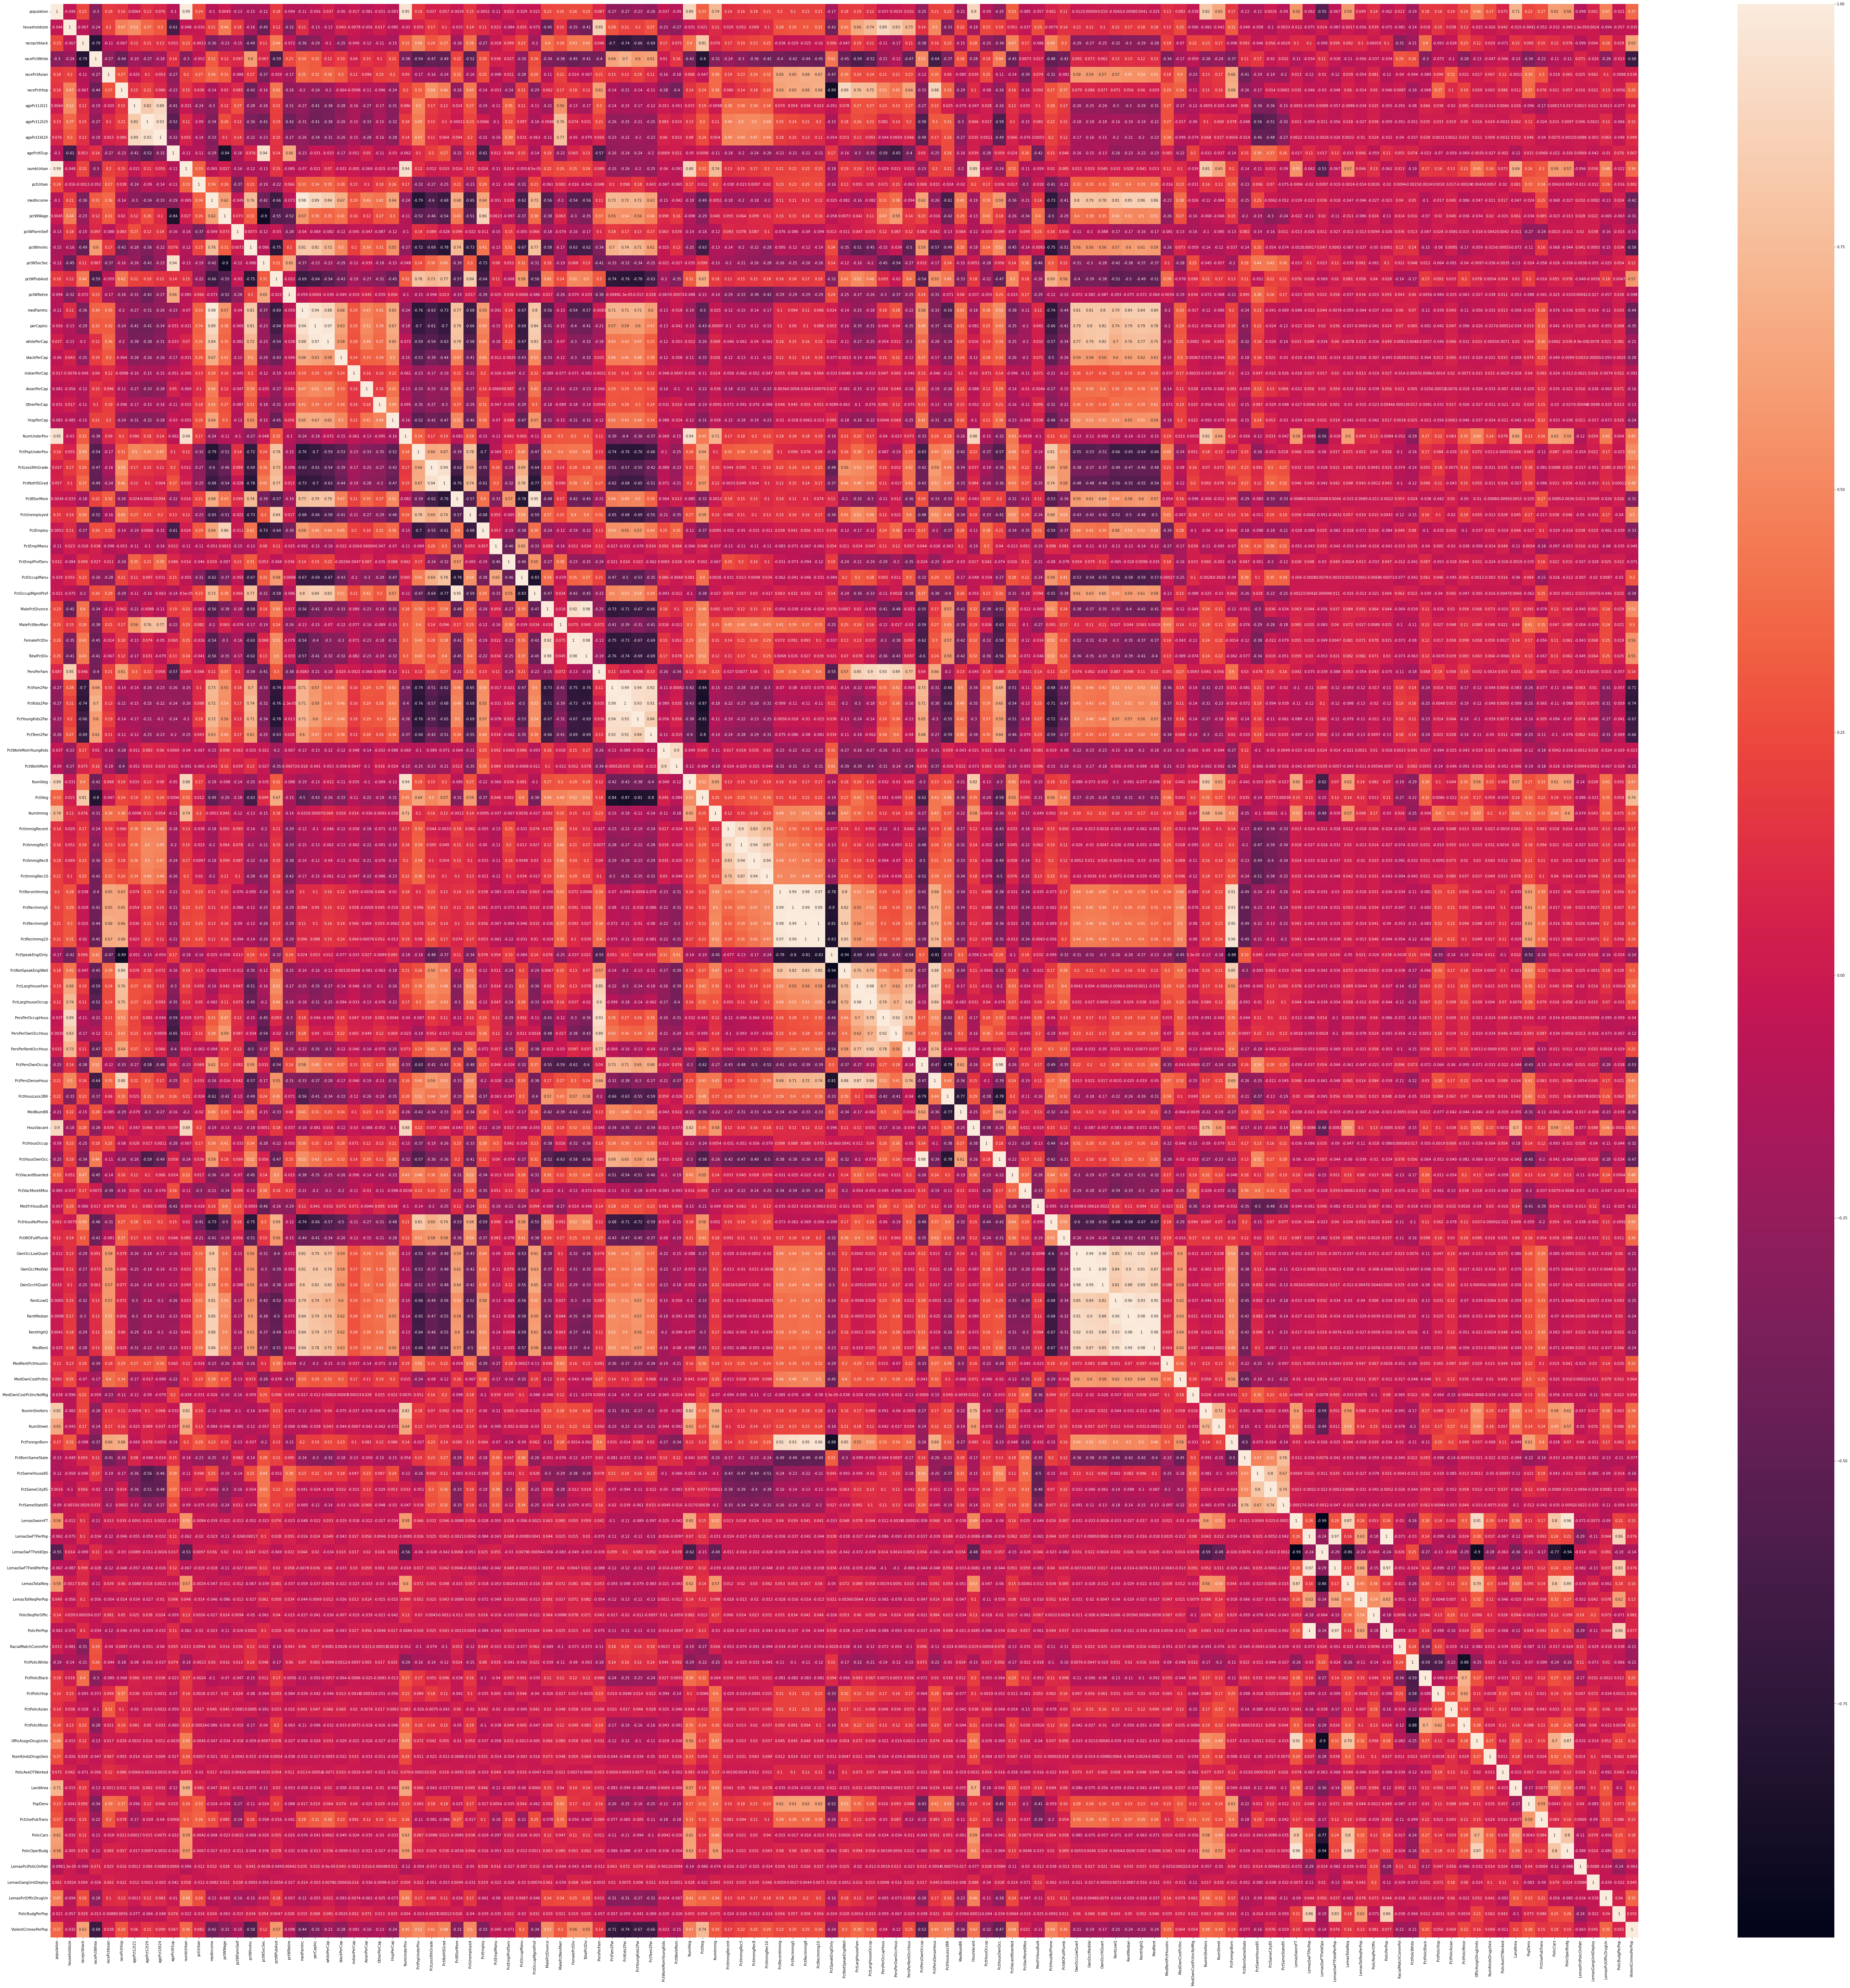

In [7]:
corrMatrix = combine.corr()
plt.figure(figsize=(100,100))
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean..

In [8]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
CV = pd.DataFrame(combine.apply(cv))
CV.columns = ['CV']
CV

CV
population           220.350254
householdsize         35.329830
racepctblack         141.092040
racePctWhite          32.378156
racePctAsian         135.916219
...                         ...
LemasPctPolicOnPatr   12.047123
LemasGangUnitDeploy   36.029936
LemasPctOfficDrugUn  255.526600
PolicBudgPerPop       34.378161
ViolentCrimesPerPop   97.901480

[123 rows x 1 columns]

#### (e) Pick [√128] features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [9]:
cv_sort = CV.sort_values(by = ['CV'], ascending=False)
cv_sort

CV
NumStreet            440.770244
NumInShelters        348.548127
NumIlleg             299.419645
NumImmig             290.049716
LemasPctOfficDrugUn  255.526600
...                         ...
NumKindsDrugsSeiz     14.686736
RacialMatchCommPol    13.261879
PctPolicWhite         12.189373
LemasPctPolicOnPatr   12.047123
LemasSwFTFieldOps      5.745683

[123 rows x 1 columns]

In [10]:
list_index = cv_sort.index.tolist()
sel_col = list_index[:round(128**0.5)]
sel_combine = combine.loc[:,sel_col]
sel_combine

NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0          0.00           0.04      0.04      0.03                 0.32   
1          0.00           0.00      0.00      0.01                 0.00   
2          0.00           0.00      0.01      0.00                 0.00   
3          0.00           0.00      0.03      0.02                 0.00   
4          0.00           0.00      0.00      0.00                 0.00   
...         ...            ...       ...       ...                  ...   
1989       0.00           0.00      0.00      0.01                 0.00   
1990       0.00           0.01      0.03      0.05                 0.00   
1991       0.02           0.06      0.13      0.06                 0.91   
1992       0.01           0.04      0.02      0.06                 0.22   
1993       0.08           0.08      0.11      0.20                 1.00   

      NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  
0            0.08        0.19       0.20        0.21      0.12         0.17  
1            0.01        0.00       0.02        0.02      0.02         0.07  
2            0.01        0.00       0.00        0.01      0.01         0.04  
3            0.01        0.04       0.06        0.01      0.02         0.10  
4            0.00        0.01       0.02        0.01      0.04         0.05  
...           ...         ...        ...         ...       ...          ...  
1989         0.01        0.01       0.03        0.02      0.01         0.16  
1990         0.04        0.05       0.06        0.03      0.02         0.32  
1991         0.12        0.16       0.17        0.21      0.08         0.25  
1992         0.03        0.08       0.09        0.05      0.03         0.10  
1993         0.16        0.20       0.21        0.12      0.11         0.77  

[1994 rows x 11 columns]

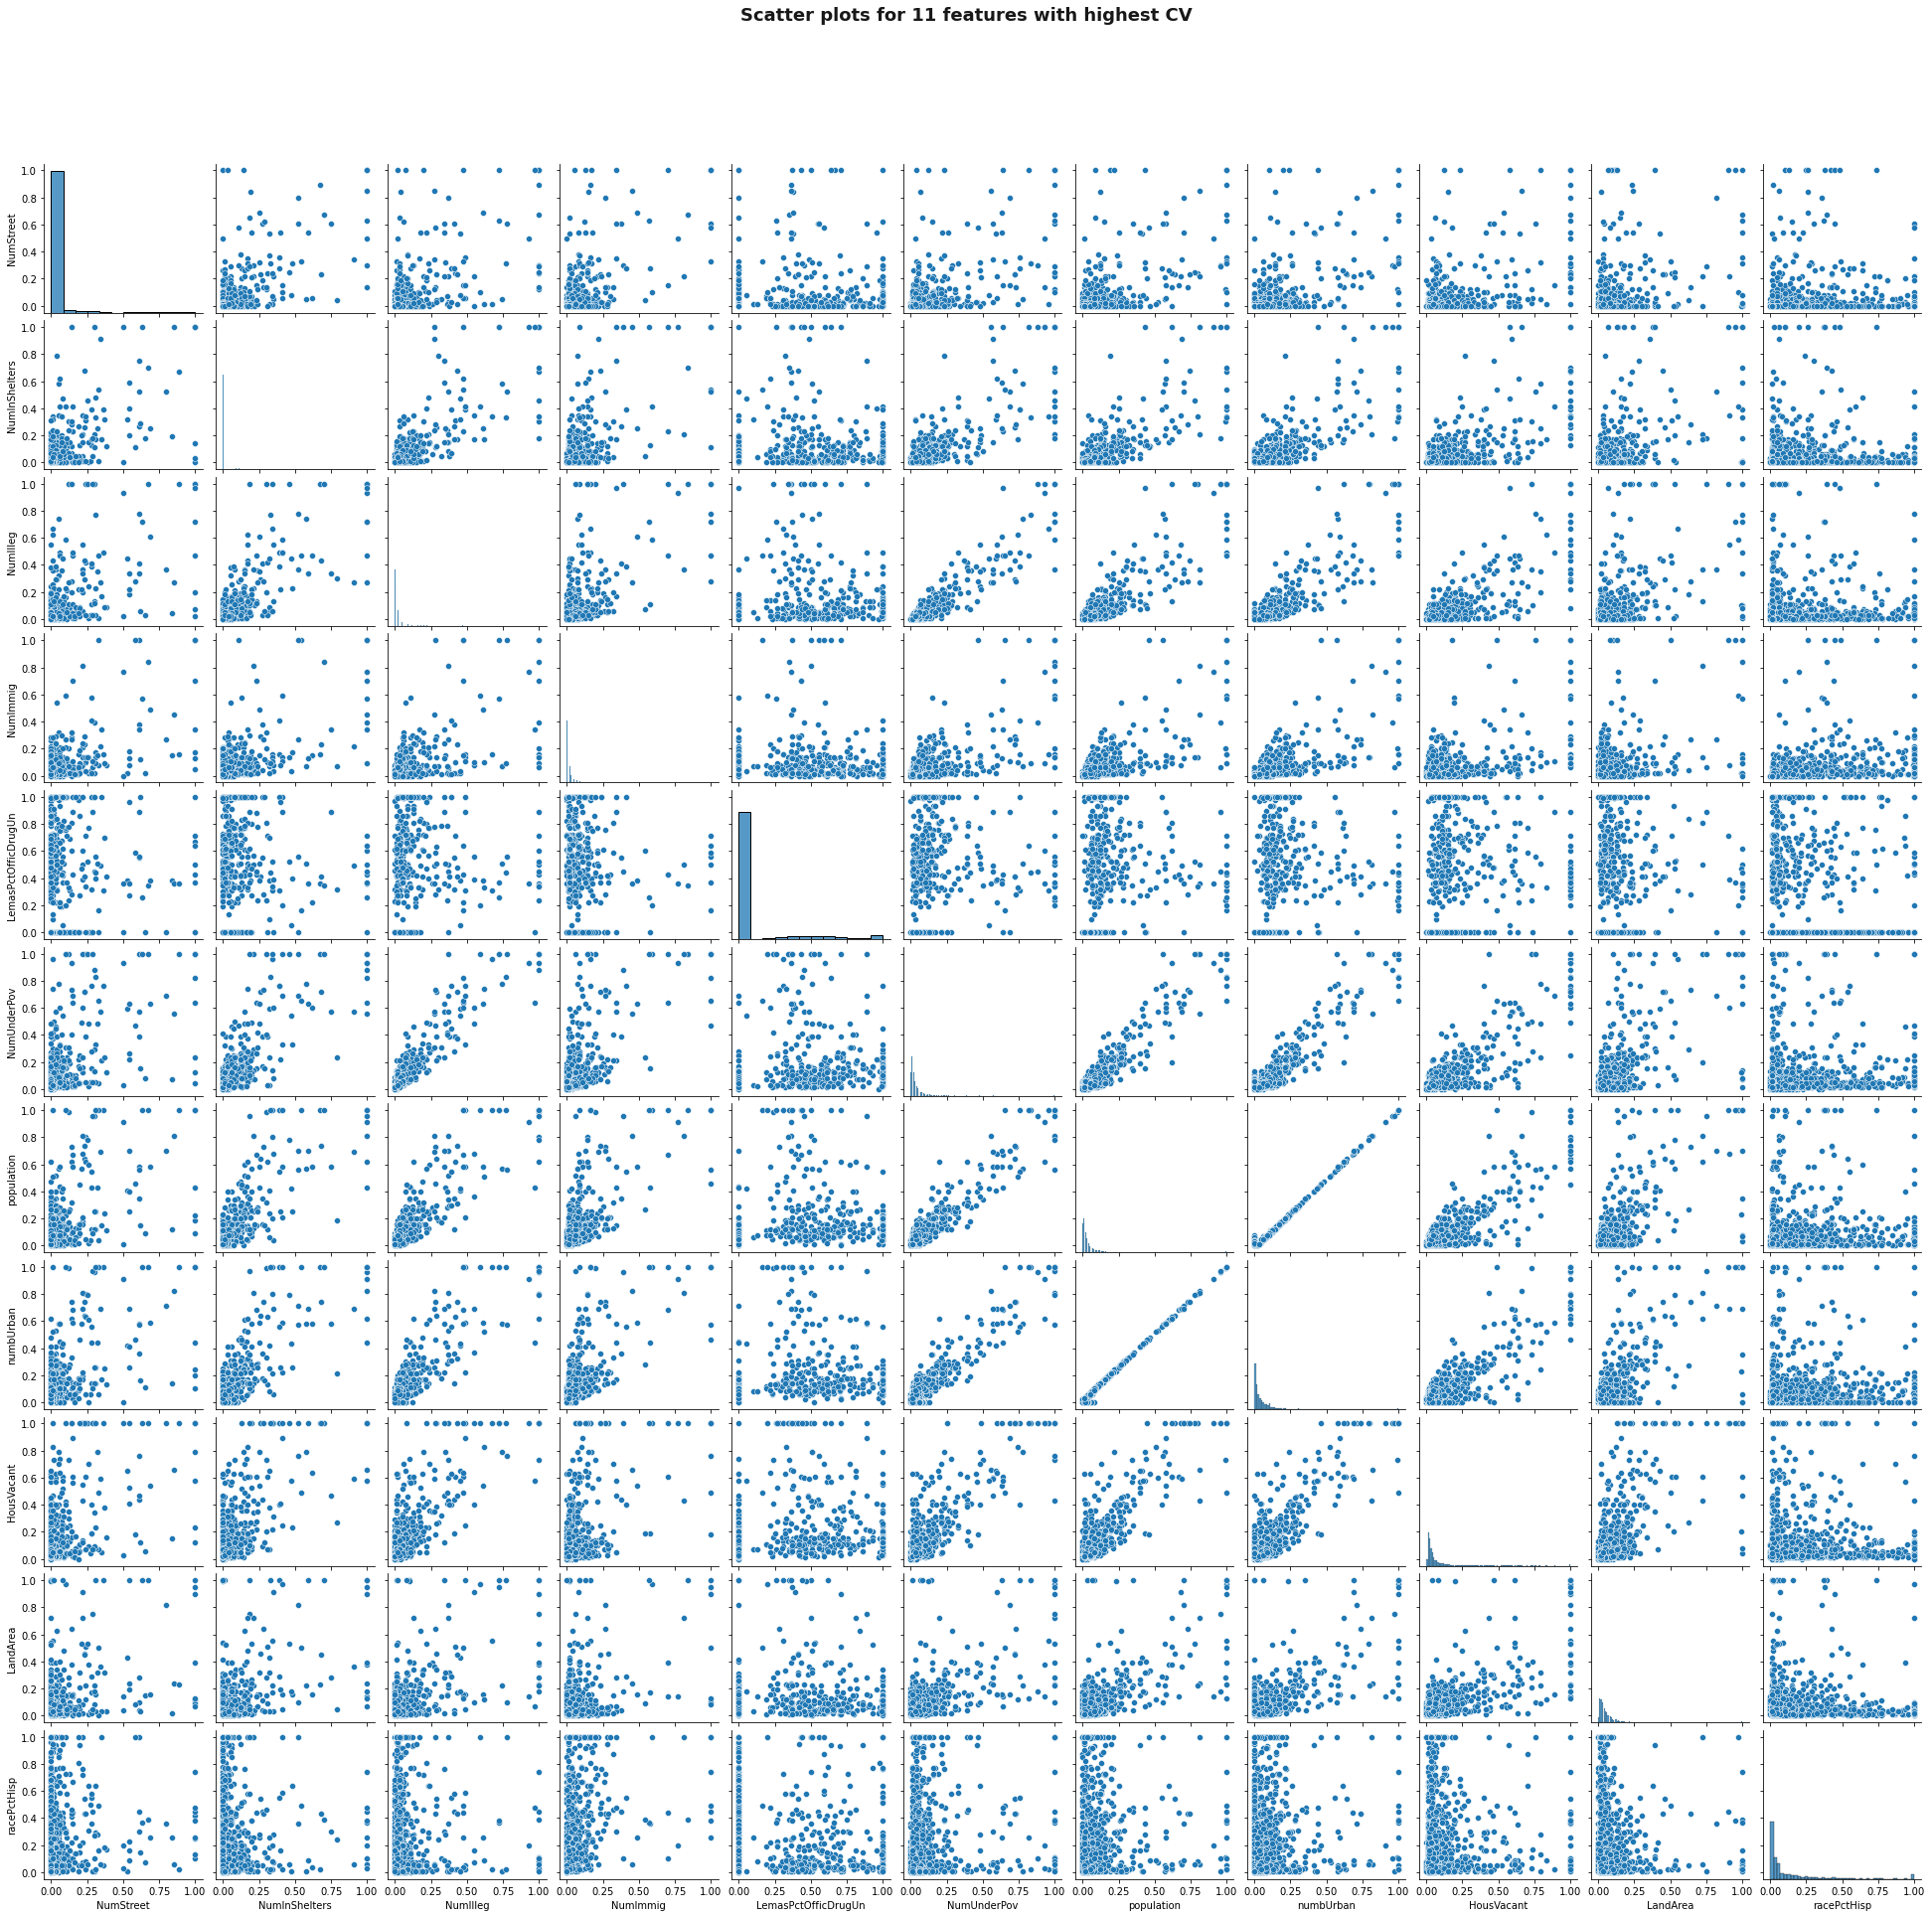

In [11]:
pairplot_fig = sns.pairplot(sel_combine)
plt.subplots_adjust(top=0.9)
pairplot_fig.fig.suptitle("Scatter plots for 11 features with highest CV", fontsize=18, alpha=0.9, weight='bold')
plt.show()

Text(0.5, 1.1, 'Boxplot for 11 features with the highest CV')

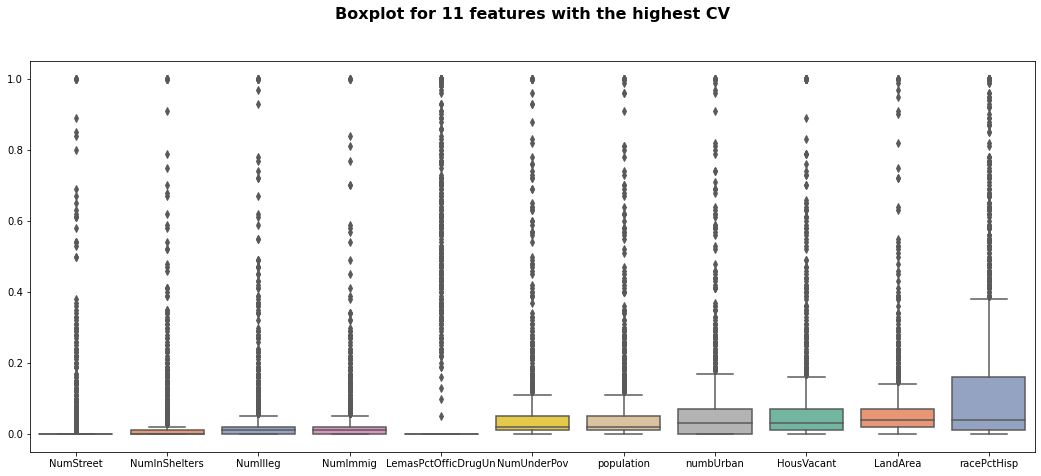

In [12]:
fig, ax = plt.subplots(figsize=(18,7))
sns.boxplot(data=sel_combine, orient="v", palette="Set2")
fig.subplots_adjust(top=0.9)
ax.text(x=0.5, y=1.1, s="Boxplot for 11 features with the highest CV", fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)


#### (f) Fit a linear model using least squares to the training set and report the test error.


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train = c_train2.iloc[:,:-1]
y_train = c_train2.iloc[:,-1]
X_test = c_test2.iloc[:,:-1]
y_test = c_test2.iloc[:,-1]
reg = LinearRegression(normalize=True)
model = reg.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Coefficients: \n", reg.coef_)
print("Intercep: ", reg.intercept_)
print("MSE: ", mean_squared_error(y_test, y_pred))

Coefficients: 
 [-1.98855148e-02 -2.69512611e-02  2.58178473e-01 -1.93314305e-02
 -8.71758994e-02  5.22218422e-02  2.32861549e-01 -3.06392894e-01
 -1.92673140e-01  1.10198590e-01 -1.32476260e-01  4.44432678e-02
 -1.70803848e-01 -9.64740281e-02  5.02904649e-02 -1.87369600e-01
  8.52206597e-02  6.10220109e-02 -9.91335909e-02  3.68175845e-01
 -6.97692900e-02 -2.47152450e-01 -8.83776030e-02 -4.94034496e-02
  1.82133820e-02  3.30443525e-02  4.40074392e-02  3.38938924e-02
 -2.10276846e-01 -6.39063556e-02  5.24381515e-02  8.91919456e-02
  5.36275086e-02  2.85812907e-01 -2.73257789e-02 -4.87317671e-03
  3.33583355e-02  9.10264193e-02  6.50644985e-01  2.38869490e-01
  3.11924229e-01 -9.07353560e-01 -7.24620260e-02 -1.03722341e-01
 -1.25712922e-01 -2.07170961e-02 -4.96894596e-02  6.80190873e-02
 -2.20991538e-01 -1.16932984e-01  6.41546881e-02 -1.49918818e-01
  1.20850936e-02  3.44107367e-03  1.72164016e-02 -9.03812963e-03
 -8.11831898e-02  1.41173674e-02  5.20886796e-02  3.73285130e-02
 -2.24260

#### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation.Report the test error obtained.

In [14]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3], cv = 5)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Coefficients: \n", clf.coef_)
print("Intercep: ", clf.intercept_)
print("Best alpha:", clf.alpha_)
print("MSE: ", mean_squared_error(y_test, y_pred))

Coefficients: 
 [-0.02218683  0.00533406  0.24770056 -0.02854747 -0.03525011  0.00488145
  0.07593574 -0.20005022 -0.05283692  0.05853129 -0.02381083  0.04417786
  0.04228882 -0.07944258  0.03607447 -0.13826381  0.07286816  0.0610478
 -0.11206067  0.05953785 -0.04317626 -0.10251048 -0.03041957 -0.03492375
  0.03091257  0.02848679  0.02870661 -0.01164272 -0.14569446 -0.05383706
  0.02577329  0.0446426  -0.00521168  0.17215477 -0.0387118  -0.00547298
  0.05240801  0.02928028  0.16076179  0.14217624 -0.10834193 -0.03717521
  0.04609569 -0.06324206 -0.13159801 -0.03938714 -0.02732264  0.0147366
 -0.14742415 -0.05573721  0.08929236 -0.08951767  0.00246973  0.00485005
  0.00205875 -0.01969917 -0.03106151  0.00067123  0.02873711  0.05924239
 -0.00287729 -0.10757545 -0.03673015 -0.08606616  0.1460053  -0.06741512
 -0.02795997 -0.11401979  0.20997409  0.08236733  0.01356093  0.1391517
 -0.06398655  0.034884    0.08350661 -0.07429544 -0.0166793   0.03334152
 -0.03137231 -0.07323674  0.03517054  

#### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model.Repeat with standardized2 features. Report the test error for both cases and compare them.

In [15]:
from sklearn.linear_model import LassoCV
las = LassoCV(cv=5, alphas= np.logspace(-5,5,11,base=10),max_iter=10000)
model = las.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Coefficients: \n", las.coef_)
print("Intercep: ", las.intercept_)
print("Best alpha:", las.alpha_)
print("MSE: ", mean_squared_error(y_test, y_pred))

Coefficients: 
 [-0.          0.          0.27305204 -0.         -0.01798214  0.
  0.07600145 -0.29112509  0.          0.00387318 -0.          0.04099461
  0.         -0.09316409  0.02905821 -0.11005721  0.0592378   0.04182285
 -0.10979718  0.         -0.         -0.06946044 -0.02254008 -0.03194572
  0.02923882  0.02361888  0.02570896 -0.         -0.15012476 -0.02130049
  0.          0.01731481 -0.          0.1550098  -0.01919701  0.
  0.01649189  0.          0.13263026  0.15069238 -0.0955719  -0.
  0.         -0.         -0.19812839 -0.03596962 -0.01153443  0.
 -0.13465667 -0.06233463  0.09557897 -0.08115944 -0.         -0.
 -0.         -0.00562052 -0.          0.          0.          0.03926042
 -0.         -0.08081295 -0.         -0.08945576  0.07330746 -0.
 -0.         -0.06435704  0.23109236  0.06485728  0.00596287  0.13029953
 -0.0595294   0.          0.07468566 -0.06286411 -0.0161948   0.0267917
 -0.02588767 -0.01886968 -0.         -0.         -0.16505491 -0.
  0.          0.173

#### (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

Best M : 95


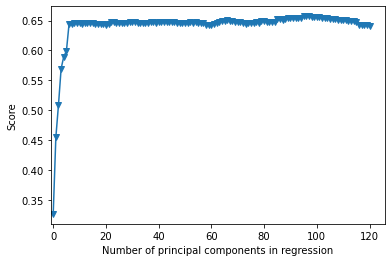

In [16]:
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
mse = []
for i in range(1,122):
    pca = PCA(n_components=i)
    model = pca.fit(X_train)
    pca_Xtrain = model.transform(X_train)
    
    kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)
    regr = LinearRegression()
    score = cross_val_score(regr, pca_Xtrain, y_train, cv=kf, n_jobs = -1).mean()
    mse.append(score)
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Score')
plt.xlim(xmin=-1);  
print("Best M :", np.argmax(mse))

In [17]:
print("Best M :", np.argmax(mse))

Best M : 95


In [18]:
pca = PCA(n_components=95)
model = pca.fit(X_train)
pca_Xtrain = model.transform(X_train)
pca_Xtest = model.transform(X_test)

regr = LinearRegression()
regr.fit(pca_Xtrain, y_train)

pred = regr.predict(pca_Xtest)
print("MSE :", mean_squared_error(y_test, pred))

MSE : 0.018489311583225143


#### (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost3 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [19]:
import xgboost as xgb

Best alphas : 10.0


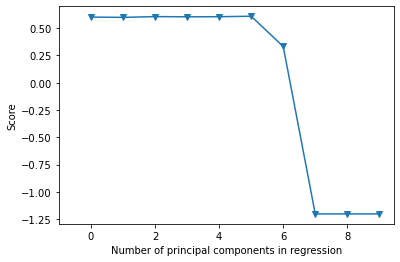

In [20]:
mse = []
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e1, 1e2, 1e3, 1e4, 1e5]
for i in alphas:
    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', max_depth = 5, reg_alpha = i, colsample_bytree = 0.7, learning_rate = 0.3)
    kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(xg_reg, X_train, y_train, cv=kf).mean()
    mse.append(score)
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Score')
plt.xlim(xmin=-1);  
print("Best alphas :", alphas[np.argmax(mse)])   

In [21]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', max_depth = 5, reg_alpha = 10, colsample_bytree = 0.7, learning_rate = 0.3)
model = xg_reg.fit(X_train, y_train)

pred = xg_reg.predict(X_test)
print("MSE :", mean_squared_error(y_test, pred))

MSE : 0.01827497955041487


### 2. Tree-Based Methods

#### (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [22]:
path2 = '../Data/aps_failure_training_set.csv'
path3 = '../Data/aps_failure_test_set.csv'
aps_train = pd.read_csv(path2, skiprows=20, header=0, sep=',') 
aps_test = pd.read_csv(path3, skiprows=20, header=0, sep=',')
aps_test

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg      60      0          20     12      0      0      0      0   
1       neg      82      0          68     40      0      0      0      0   
2       neg   66002      2         212    112      0      0      0      0   
3       neg   59816     na        1010    936      0      0      0      0   
4       neg    1814     na         156    140      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995   neg   81852     na  2130706432    892      0      0      0      0   
15996   neg      18      0          52     46      8     26      0      0   
15997   neg   79636     na        1670   1518      0      0      0      0   
15998   neg     110     na          36     32      0      0      0      0   
15999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008  \
0          0  ...    1098     138     412     654       78      88       0   
1          0  ...    1068     276    1620     116       86     462       0   
2          0  ...  495076  380368  440134  269556  1315022  153680     516   
3          0  ...  540820  243270  483302  485332   431376  210074  281662   
4          0  ...    7646    4144   18466   49782     3176     482      76   
...      ...  ...     ...     ...     ...     ...      ...     ...     ...   
15995      0  ...  632658  273242  510354  373918   349840  317840  960024   
15996      0  ...     266      44      46      14        2       0       0   
15997      0  ...  806832  449962  778826  581558   375498  222866  358934   
15998      0  ...     588     210     180     544     1004    1338      74   
15999      0  ...      46      10      48      14       42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1          0      0      0  
2          0      0      0  
3       3232      0      0  
4          0      0      0  
...      ...    ...    ...  
15995  25566      0      0  
15996      0      0      0  
15997  19548      0      0  
15998      0      0      0  
15999      0      0      0  

[16000 rows x 171 columns]

#### (b) Data Preparation

#### This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

#### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [23]:
aps_full = pd.concat([aps_train,aps_test], ignore_index=True)
aps_full

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995   neg   81852     na  2130706432    892      0      0      0      0   
75996   neg      18      0          52     46      8     26      0      0   
75997   neg   79636     na        1670   1518      0      0      0      0   
75998   neg     110     na          36     32      0      0      0      0   
75999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3          0  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 171 columns]

In [24]:
cols = aps_full.columns.values.tolist()
missing = []
for i in cols:
    if 'na' in aps_full[i].values.tolist():
        missing.append(i)
        missing.append(aps_full[i].value_counts()['na']/76000)
missing

['ab_000',
 0.7722631578947369,
 'ac_000',
 0.05606578947368421,
 'ad_000',
 0.24792105263157896,
 'ae_000',
 0.041973684210526316,
 'af_000',
 0.041973684210526316,
 'ag_000',
 0.011315789473684211,
 'ag_001',
 0.011315789473684211,
 'ag_002',
 0.011315789473684211,
 'ag_003',
 0.011315789473684211,
 'ag_004',
 0.011315789473684211,
 'ag_005',
 0.011315789473684211,
 'ag_006',
 0.011315789473684211,
 'ag_007',
 0.011315789473684211,
 'ag_008',
 0.011315789473684211,
 'ag_009',
 0.011315789473684211,
 'ah_000',
 0.010789473684210526,
 'ai_000',
 0.010421052631578947,
 'aj_000',
 0.010421052631578947,
 'ak_000',
 0.0736578947368421,
 'al_000',
 0.010671052631578947,
 'am_0',
 0.010421052631578947,
 'an_000',
 0.010671052631578947,
 'ao_000',
 0.009881578947368422,
 'ap_000',
 0.010671052631578947,
 'aq_000',
 0.009881578947368422,
 'ar_000',
 0.04588157894736842,
 'as_000',
 0.010421052631578947,
 'at_000',
 0.010421052631578947,
 'au_000',
 0.010421052631578947,
 'av_000',
 0.041947368

In [25]:
aps_full1 = aps_full.replace('na', np.nan)
aps_full1

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698    NaN  2130706438    280      0      0      0      0   
1       neg   33058    NaN           0    NaN      0      0      0      0   
2       neg   41040    NaN         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874    NaN        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995   neg   81852    NaN  2130706432    892      0      0      0      0   
75996   neg      18      0          52     46      8     26      0      0   
75997   neg   79636    NaN        1670   1518      0      0      0      0   
75998   neg     110    NaN          36     32      0      0      0      0   
75999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3          0  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 171 columns]

### ISLR 6.8.3,ISLR, 6.8.5,ISLR 8.4.5 in the pdf in the Notebook file.

### 9.7.3

#### (a)(b)(d) Sketch

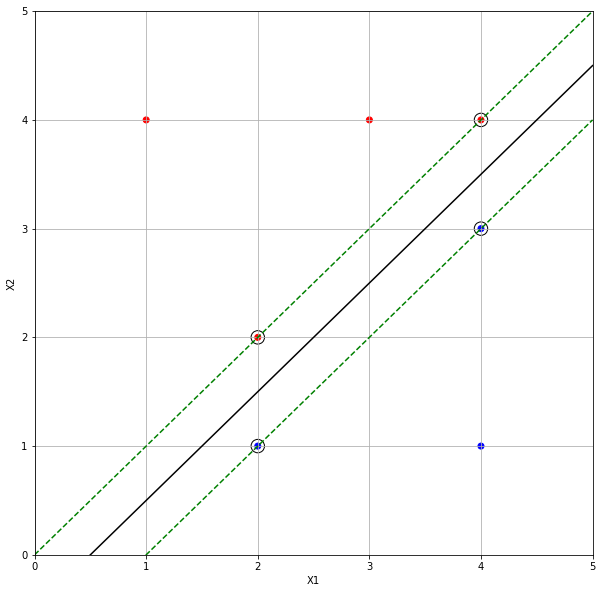

In [ ]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
X = [[3, 2, 4, 1, 2, 4, 4], [4, 2, 4, 4, 1, 3, 1]]
Y = ['r', 'r', 'r', 'r', 'b', 'b', 'b']

# fit the model
clf = svm.SVC(kernel='linear', C=100)
clf.fit(np.array(X).T.tolist(), Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.scatter(X[0], X[1], c=['r', 'r', 'r', 'r', 'b', 'b', 'b'])
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

#### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane

Because the optimal separating hyperplane is the line which passes through the points (2,1.5) and (4,3.5) which equation is X1 - X2 - 0.5 = 0

#### (c) Describe the classification rule for the maximal margin classifier

In [ ]:
- (clf.intercept_[0]) / w[1]

-0.5000000000000009

In [ ]:
a

1.0

The classification rule is “Classify to Red if X1−X2−0.5<0 and classify to Blue otherwise.

#### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

#### (e) Indicate the support vectors for the maximal margin classifier.

The support vectors are the points (2,1), (2,2), (4,3) and (4,4).

#### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

By examining the plot, it is clear that if we moved the observation (1,4), we would not change the maximal margin hyperplane as it is not a support vector.

#### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

X1−X2−0.3=0  is not the optimal separating hyperplane.

In [ ]:
plot(x1, x2, col = colors, xlim = c(0, 5), ylim = c(0, 5))
abline(-0.3, 1)

#### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

Text(0, 0.5, 'X2')

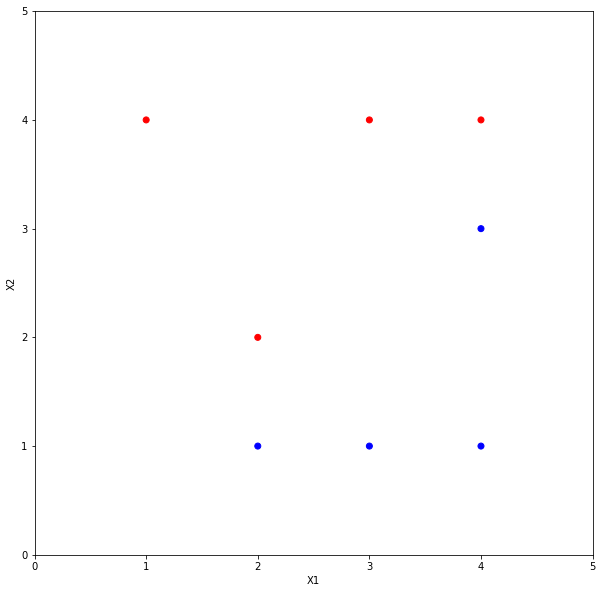

In [ ]:
X = [[3, 2, 4, 1, 2, 4, 4, 3], [4, 2, 4, 4, 1, 3, 1, 1]]
Y = ['r', 'r', 'r', 'r', 'b', 'b', 'b', 'b']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.scatter(X[0], X[1], c=['r', 'r', 'r', 'r', 'b', 'b', 'b', 'b'])
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')